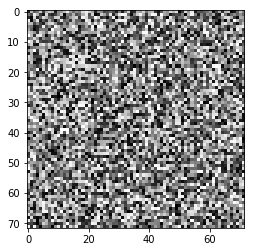

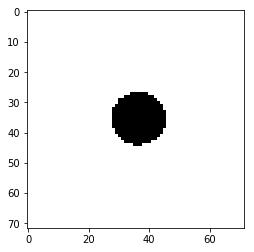

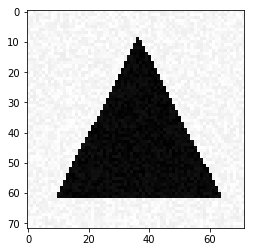

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

im = generate_a_disk(0)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



In [2]:
#generate training data
from keras.utils import np_utils
[X_train, Y_train] = generate_dataset_classification(300, 20)
Y_train = np_utils.to_categorical(Y_train, 3)

Using TensorFlow backend.


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

## Building and training a linear classifier in Keras to classify a image into one of the three possible categories

#### 1) Using the stochastic gradient descent optimizer

In [4]:
model = Sequential([
    Dense(3, activation='softmax',input_shape=X_train[0].shape)
])
model.compile(loss='categorical_crossentropy', optimizer='sgd')

#running the optimization
model.fit(X_train, Y_train, epochs=20, batch_size=32)


Epoch 1/20
300/300 [==============================] - 1s 5ms/step - loss: 9.5150
Epoch 2/20
300/300 [==============================] - 0s 123us/step - loss: 10.6917
Epoch 3/20
300/300 [==============================] - 0s 146us/step - loss: 10.6917
Epoch 4/20
300/300 [==============================] - 0s 322us/step - loss: 10.6917
Epoch 5/20
300/300 [==============================] - 0s 475us/step - loss: 10.6917
Epoch 6/20
300/300 [==============================] - 0s 116us/step - loss: 10.6917
Epoch 7/20
300/300 [==============================] - 0s 143us/step - loss: 10.6917
Epoch 8/20
300/300 [==============================] - 0s 130us/step - loss: 10.6917
Epoch 9/20
300/300 [==============================] - 0s 110us/step - loss: 10.6917
Epoch 10/20
300/300 [==============================] - 0s 133us/step - loss: 10.6917
Epoch 11/20
300/300 [==============================] - 0s 163us/step - loss: 10.6917
Epoch 12/20
300/300 [==============================] - 0s 126us/step - loss: 

#### 2) Using the Adam optimizer

In [5]:
model = Sequential([
    Dense(3, activation='softmax',input_shape=X_train[0].shape)
])

model.compile(loss='categorical_crossentropy', optimizer='Adam')

#running the optimization
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
300/300 [==============================] - 0s 644us/step - loss: 2.1154
Epoch 2/20
300/300 [==============================] - 0s 296us/step - loss: 0.8847
Epoch 3/20
300/300 [==============================] - 0s 126us/step - loss: 0.5369
Epoch 4/20
300/300 [==============================] - ETA: 0s - loss: 0.543 - 0s 106us/step - loss: 0.3893
Epoch 5/20
300/300 [==============================] - 0s 329us/step - loss: 0.3340
Epoch 6/20
300/300 [==============================] - 0s 116us/step - loss: 0.3012
Epoch 7/20
300/300 [==============================] - 0s 130us/step - loss: 0.2533
Epoch 8/20
300/300 [==============================] - 0s 133us/step - loss: 0.2766
Epoch 9/20
300/300 [==============================] - 0s 113us/step - loss: 0.2901
Epoch 10/20
300/300 [==============================] - ETA: 0s - loss: 0.653 - 0s 110us/step - loss: 0.3269
Epoch 11/20
300/300 [==============================] - 0s 150us/step - loss: 0.2231
Epoch 12/20
300/300 [================

In [6]:
#test classifier if input is a disk
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [7]:
#test classifier if input is a rectangle
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

In [8]:
#test classifier if input is a triangle
X_test = generate_a_triangle(10)[0]
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

##### The sgd optimizer does not converge all the time, whereas the adam optimizer always converge very quickly

## Visualization of the solution


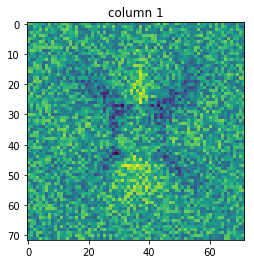

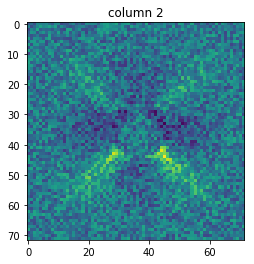

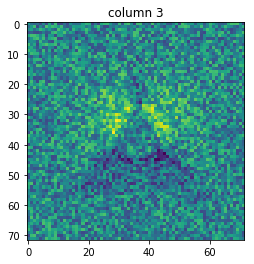

In [9]:
for i in range(3):
    plt.imshow(model.get_weights()[0][:,i].reshape((IMAGE_SIZE,IMAGE_SIZE)))
    plt.title('column {}'.format(i+1))
    plt.show()

## A more difficult classification problem

In [10]:
[X_train, Y_train] = generate_dataset_classification(1000, 20, True)
Y_train = np_utils.to_categorical(Y_train, 3) 

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [11]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [12]:
model = Sequential([
    Dense(3, activation='softmax',input_shape=X_train[0].shape)
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#running the optimization
model.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
1000/1000 [==============================] - 0s 346us/step - loss: 1.5006 - acc: 0.3810
Epoch 2/20
1000/1000 [==============================] - 0s 134us/step - loss: 0.9987 - acc: 0.5000
Epoch 3/20
1000/1000 [==============================] - 0s 128us/step - loss: 0.9233 - acc: 0.5500
Epoch 4/20
1000/1000 [==============================] - 0s 151us/step - loss: 0.9154 - acc: 0.5460
Epoch 5/20
1000/1000 [==============================] - 0s 135us/step - loss: 0.8865 - acc: 0.5740
Epoch 6/20
1000/1000 [==============================] - 0s 212us/step - loss: 0.8530 - acc: 0.5750
Epoch 7/20
1000/1000 [==============================] - 0s 176us/step - loss: 0.8322 - acc: 0.6110
Epoch 8/20
1000/1000 [==============================] - 0s 205us/step - loss: 0.8639 - acc: 0.5880
Epoch 9/20
1000/1000 [==============================] - 0s 232us/step - loss: 0.8171 - acc: 0.6230
Epoch 10/20
1000/1000 [==============================] - 0s 242us/step - loss: 0.8124 - acc: 0.6080
Epoch 11/

In [13]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 316us/step


[0.8313225873311361, 0.5666666674613953]

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

#convolutional model
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu',
          input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

#using adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#running the optimization
model.fit(X_train.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1), Y_train,
          batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.3554 - acc: 0.3870
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9547 - acc: 0.5930
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7653 - acc: 0.7060
Epoch 4/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.7032 - acc: 0.6750
Epoch 5/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6200 - acc: 0.7630
Epoch 6/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5638 - acc: 0.7960
Epoch 7/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.5452 - acc: 0.7750
Epoch 8/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5036 - acc: 0.8010
Epoch 9/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4547 - acc: 0.8530
Epoch 10/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4132 - acc: 0.8660
Epoch 11/20
1000/1000 [======

In [15]:
model.evaluate(X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1), Y_test)

300/300 [==============================] - 1s 3ms/step


[0.42550805886586507, 0.8633333325386048]

The accuracy is better when using the convolutional deep network

## A Regression Problem

In [16]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


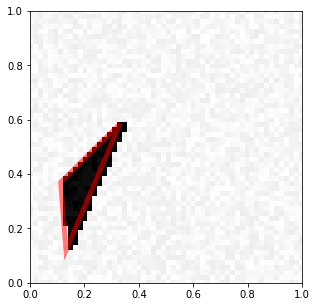

In [17]:
visualize_prediction(X_train[0], Y_train[0])


In [18]:
def sort_points(x):
    return np.apply_along_axis(lambda x :sorted(list(x.reshape((3,2))), key= lambda y: (y[0], y[1])), axis=1, arr=x)

In [19]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(6))
model.compile(optimizer='Adam', loss='mse')
model.fit(X_train.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1), sort_points(Y_train).reshape((-1,6)), epochs=20, batch_size=32)

Epoch 1/20
300/300 [==============================] - 1s 5ms/step - loss: 1.1857
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2562
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.1269
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0718
Epoch 5/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0473A: 0s - loss: 0.0
Epoch 6/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0330A: 0s - loss: 0.03 - ETA: 0s - loss: 0.0
Epoch 7/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0265
Epoch 8/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0222
Epoch 9/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0178
Epoch 10/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0142
Epoch 11/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0115
Epoch 12/20
300/300 [=============================

In [20]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [21]:
model.evaluate(X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1), sort_points(Y_test).reshape((-1,6)))

300/300 [==============================] - 1s 2ms/step


0.03698759873708089

## Image denoising

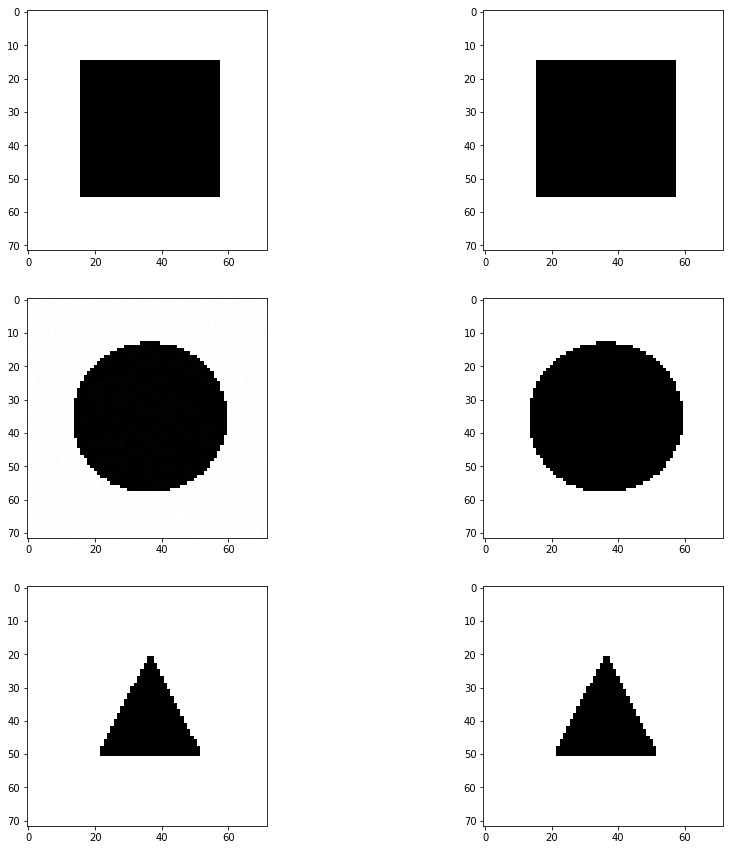

In [22]:
def generate_a_drawing(figsize, U, V, max_noise=30.0):
    noise=max_noise*np.random.random()
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata0 = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata1 = imdata0 + noise * np.random.random(imdata0.size)
    plt.close(fig)
    return imdata1,imdata0

def generate_a_rectangle(max_noise=30.0,free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V,max_noise)


def generate_a_disk(max_noise=30.0,free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V,max_noise)

def generate_a_triangle(max_noise=30.0,free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return generate_a_drawing(figsize, U, V,max_noise)


f = plt.figure(figsize=(15, 15))
im = generate_a_rectangle(True)+generate_a_disk()+ generate_a_triangle(False)
axarr = f.subplots(3,2)
for i in range(3):
    for j in range(2):
        axarr[i][j].imshow(im[i*2+j].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')






In [23]:
def generate_dataset_denoising(nb_samples, max_noise=30.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i],Y[i] = generate_a_rectangle(max_noise, free_location)
        elif category == 1: 
            X[i],Y[i] = generate_a_disk(max_noise, free_location)
        else:
            X[i],Y[i] = generate_a_triangle(max_noise, free_location)
    return [X, Y]

def generate_test_set_denoising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300, 30, True)
    return [X_test, Y_test]

In [24]:
#generate training data
[X_train, Y_train] = generate_dataset_denoising(300,30, True)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


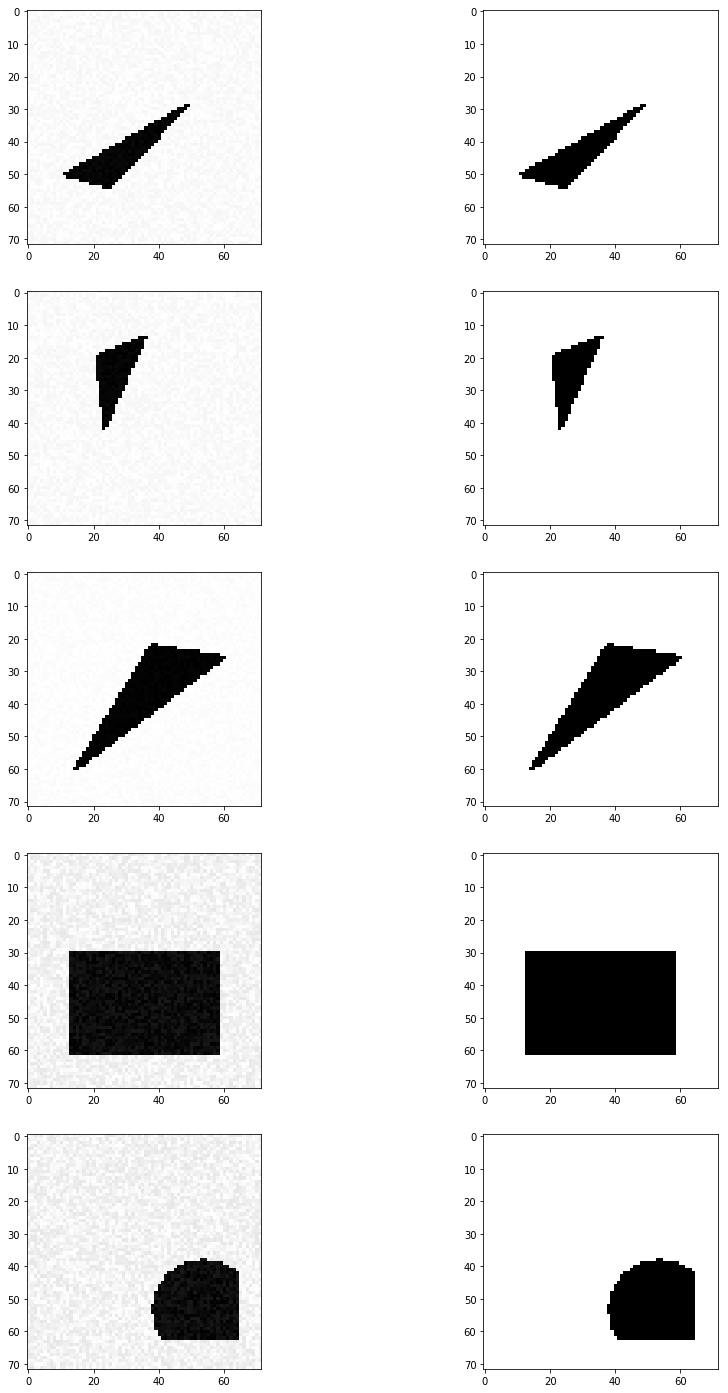

In [25]:
#data visualisation
n_sample=5
f = plt.figure(figsize=(15, n_sample*5))
axarr = f.subplots(n_sample,2)
for i in range(n_sample):
    for j in range(2):
        if j==0:
            axarr[i][j].imshow(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
        else:
            axarr[i][j].imshow(Y_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [26]:
[X_test, Y_test] = generate_test_set_denoising()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [ ]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(IMAGE_SIZE*IMAGE_SIZE))
model.compile(optimizer='Adam', loss='mse')
model.fit(X_train.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1), Y_train, epochs=20, batch_size=32)


Epoch 1/20
300/300 [==============================] - 36s 120ms/step - loss: 33196.2656
Epoch 2/20
300/300 [==============================] - 33s 109ms/step - loss: 8605.4951
Epoch 3/20
300/300 [==============================] - 27s 91ms/step - loss: 3701.9511
Epoch 4/20
300/300 [==============================] - 26s 86ms/step - loss: 2137.1248
Epoch 5/20
288/300 [===========================>..] - ETA: 1s - loss: 1473.3045

In [28]:
model.evaluate(X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1), Y_test)

300/300 [==============================] - 3s 9ms/step


1089.5777490234375

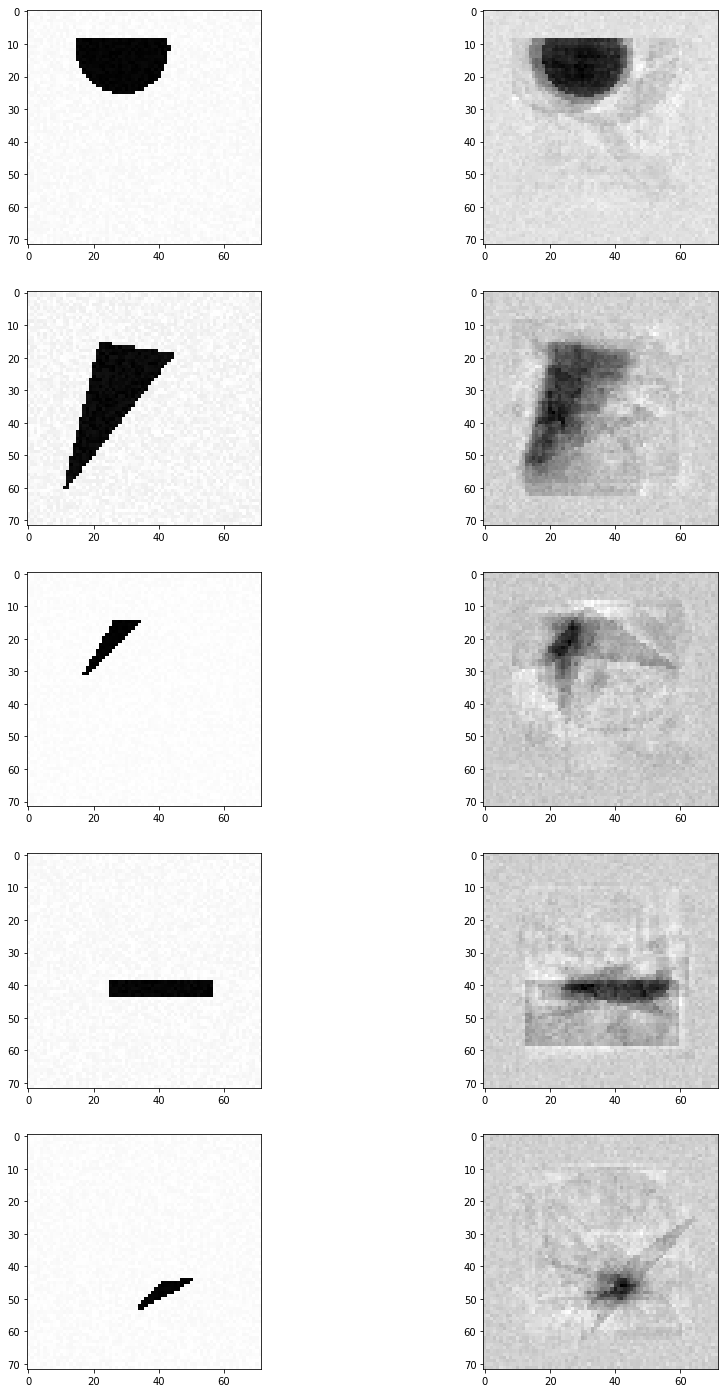

In [34]:
#data visualisation

Y_predicted = model.predict(X_test.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1))

n_sample=5
f = plt.figure(figsize=(15, n_sample*5))
axarr = f.subplots(n_sample,2)
for i in range(n_sample):
    for j in range(2):
        if j==0:
            axarr[i][j].imshow(X_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
        else:
            axarr[i][j].imshow(Y_predicted[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')